# Algoritmos Supervisados

- Linear regressión / Regresión Lineal: https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal <br/>
<img style=" background-color: #FFF;" src="images/linearregression.png" width=20%/>
- Regresión logística: https://es.wikipedia.org/wiki/Regresi%C3%B3n_log%C3%ADstica
- Máquinas de vectores de soporte / SVM: https://es.wikipedia.org/wiki/M%C3%A1quinas_de_vectores_de_soporte
- CART / Classification And Regression Trees https://www.nature.com/articles/nmeth.4370
- Gradient Boosting / Potenciación del gradiente: https://es.wikipedia.org/wiki/Gradient_boosting
- Random Forest / Bosques aleatorios: https://es.wikipedia.org/wiki/Random_forest
- Artificial Neural Networks (*):  https://en.wikipedia.org/wiki/Artificial_neural_network
- K-vecinos cercanos / K-nearest neighbors (k-nn): https://es.wikipedia.org/wiki/K_vecinos_m%C3%A1s_pr%C3%B3ximos
- Análisis Discriminantel Lineal / LDA: https://es.wikipedia.org/wiki/An%C3%A1lisis_discriminante_lineal
- ...


<img src="images/ModelSelection_ref_book_5.png" width=80%/>

> Fuente: [5] Machine Learning & Data Science Blueprints for Finance


### Implementaciones en scikit-learn:
 https://scikit-learn.org/stable/supervised_learning.html


# Vamos a jugar 

¡Necesitamos datos! Principalmente, datos con índices de tiempo: **series temporales**.

Por ello, vamos a instalar una librería que nos proporcionará fácilmente datos de juego: pandas_datareader. (Paso 0)

Y con una seríe temporal  podemos descomponerla y aplicar predicción:
- Descomposición aditiva o multiplicativa: $Y[t] = T[t] + S[t] + e[t]$ (Paso 1)
- Modelos "tradiccionales" de predicción: ARIMA, SARIMA,... (Paso 2)


In [ ]:
%pip install pandas_datareader

In [20]:
# Paso 0
import pandas as pd
import pandas_datareader.data as web
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
stk_data = web.DataReader(stk_tickers, 'yahoo')   
print(type(stk_data))

<class 'pandas.core.frame.DataFrame'>


In [22]:
stk_data # Python tip: una invocación stk_data.__rep__

Attributes   Adj Close                               Close              \
Symbols           MSFT         IBM       GOOGL        MSFT         IBM   
Date                                                                     
2017-09-21   69.731400  109.482437   47.377499   74.209999  138.871887   
2017-09-22   69.919357  109.384430   47.162998   74.410004  138.747604   
2017-09-25   68.838745  109.942154   46.714001   73.260002  139.455063   
2017-09-26   68.838745  110.462227   46.871498   73.260002  140.114716   
2017-09-27   69.393135  109.783897   47.994999   73.849998  139.254303   
...                ...         ...         ...         ...         ...   
2022-09-13  251.990005  127.250000  104.320000  251.990005  127.250000   
2022-09-14  252.220001  127.690002  105.000000  252.220001  127.690002   
2022-09-15  245.380005  125.489998  102.910004  245.380005  125.489998   
2022-09-16  244.740005  127.269997  102.800003  244.740005  127.269997   
2022-09-19  244.520004  127.730003  103.070000  244.520004  127.730003   

Attributes                    High                                 Low  \
Symbols          GOOGL        MSFT         IBM       GOOGL        MSFT   
Date                                                                     
2017-09-21   47.377499   75.239998  139.474182   47.639999   74.110001   
2017-09-22   47.162998   74.510002  139.187378   47.500000   73.849998   
2017-09-25   46.714001   74.250000  139.608032   46.987499   72.919998   
2017-09-26   46.871498   73.809998  140.936905   47.203999   72.989998   
2017-09-27   47.994999   74.169998  140.439774   48.271500   73.169998   
...                ...         ...         ...         ...         ...   
2022-09-13  104.320000  260.399994  129.910004  108.300003  251.589996   
2022-09-14  105.000000  254.229996  129.000000  105.279999  249.860001   
2022-09-15  102.910004  251.399994  127.470001  105.269997  244.020004   
2022-09-16  102.800003  245.300003  127.529999  103.129997  242.059998   
2022-09-19  103.070000  245.139999  128.059998  103.330002  240.850006   

Attributes                                Open                          \
Symbols            IBM       GOOGL        MSFT         IBM       GOOGL   
Date                                                                     
2017-09-21  138.718933   46.969002   75.110001  139.244736   47.406502   
2017-09-22  138.231354   47.042000   73.989998  139.187378   47.138500   
2017-09-25  138.537292   46.225498   74.089996  138.738052   46.972500   
2017-09-26  139.521988   46.756001   73.669998  139.923523   46.834499   
2017-09-27  138.652008   47.097500   73.550003  140.229446   47.137001   
...                ...         ...         ...         ...         ...   
2022-09-13  126.769997  104.089996  258.839996  129.139999  107.800003   
2022-09-14  126.849998  103.660004  253.529999  127.500000  104.570000   
2022-09-15  124.900002  102.349998  249.770004  127.389999  104.029999   
2022-09-16  123.830002  100.940002  244.259995  124.360001  102.070000   
2022-09-19  126.279999  101.550003  242.470001  126.489998  101.750000   

Attributes      Volume                         
Symbols           MSFT        IBM       GOOGL  
Date                                           
2017-09-21  19186100.0  2673158.0  27414000.0  
2017-09-22  14111400.0  2920746.0  21496000.0  
2017-09-25  24149200.0  5452903.0  37468000.0  
2017-09-26  18019600.0  4695076.0  33454000.0  
2017-09-27  19565100.0  3663824.0  46692000.0  
...                ...        ...         ...  
2022-09-13  33353300.0  4565600.0  38172900.0  
2022-09-14  23913000.0  3819100.0  26395100.0  
2022-09-15  31530900.0  5141700.0  34188300.0  
2022-09-16  39775100.0  9838600.0  42780300.0  
2022-09-19  26790800.0  3981300.0  23002300.0  

[1257 rows x 18 columns]

In [8]:
stk_data.columns # ¿Cómo es el índice de acceso a los datos?

MultiIndex([('Adj Close',  'MSFT'),
            ('Adj Close',   'IBM'),
            ('Adj Close', 'GOOGL'),
            (    'Close',  'MSFT'),
            (    'Close',   'IBM'),
            (    'Close', 'GOOGL'),
            (     'High',  'MSFT'),
            (     'High',   'IBM'),
            (     'High', 'GOOGL'),
            (      'Low',  'MSFT'),
            (      'Low',   'IBM'),
            (      'Low', 'GOOGL'),
            (     'Open',  'MSFT'),
            (     'Open',   'IBM'),
            (     'Open', 'GOOGL'),
            (   'Volume',  'MSFT'),
            (   'Volume',   'IBM'),
            (   'Volume', 'GOOGL')],
           names=['Attributes', 'Symbols'])

In [9]:
stk_data[('Adj Close',  'MSFT')] #Hagamos una prueba

Date
2017-09-21     69.731407
2017-09-22     69.919342
2017-09-25     68.838745
2017-09-26     68.838745
2017-09-27     69.393135
                 ...    
2022-09-13    251.990005
2022-09-14    252.220001
2022-09-15    245.380005
2022-09-16    244.740005
2022-09-19    244.520004
Name: (Adj Close, MSFT), Length: 1257, dtype: float64

In [ ]:
%pip install statsmodels

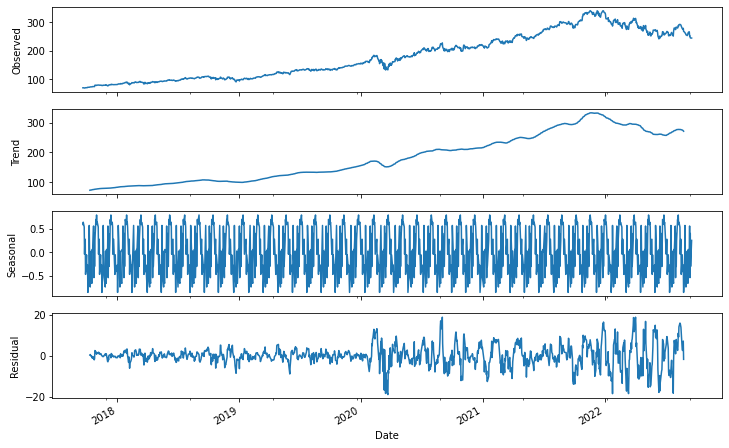

In [21]:
# Paso 1
import matplotlib.pyplot as plt
import statsmodels.api as sm
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

res = sm.tsa.seasonal_decompose(stk_data[('Adj Close',  'MSFT')],period=30)
#res.plot()

fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12,8))
res.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
res.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
res.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
res.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
plt.show()

In [40]:
# Paso 2.a  Cargamos/Fit/Entrenamos ARIMA
from statsmodels.tsa.arima_model import ARIMA
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html
close_msft = stk_data[('Adj Close',  'MSFT')]
close_msft.index = close_msft.index.to_period("M") # a mes
print(close_msft.shape)
print(close_msft[-12:])


(1257,)
Date
2022-09    260.399994
2022-09    256.059998
2022-09    253.250000
2022-09    258.089996
2022-09    258.519989
2022-09    264.459991
2022-09    266.649994
2022-09    251.990005
2022-09    252.220001
2022-09    245.380005
2022-09    244.740005
2022-09    244.520004
Freq: M, Name: (Adj Close, MSFT), dtype: float64


In [41]:
mod = sm.tsa.arima.ARIMA(endog=close_msft, order=(3, 1, 0))
#Un 3 por autoregression, 1 para hacer la serie estacionaria, y una media móvil de 0.
modfit = mod.fit()
print(modfit.summary())


                                 SARIMAX Results                                 
Dep. Variable:     ('Adj Close', 'MSFT')   No. Observations:                 1257
Model:                    ARIMA(3, 1, 0)   Log Likelihood               -3385.075
Date:                   Tue, 20 Sep 2022   AIC                           6778.150
Time:                           13:29:35   BIC                           6798.693
Sample:                       09-30-2017   HQIC                          6785.871
                            - 09-30-2022                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1465      0.017     -8.404      0.000      -0.181      -0.112
ar.L2          0.0229      0.018      1.249      0.212      -0.013       0.059
ar.L3         -0.0129      0

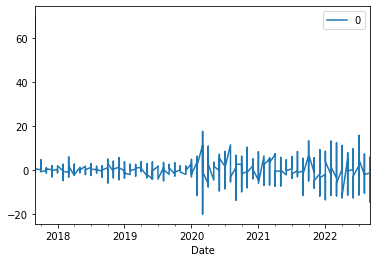

                 0
count  1257.000000
mean      0.213587
std       4.082031
min     -19.818788
25%      -1.136437
50%       0.204804
75%       1.724798
max      69.731400


In [43]:
residuals = pd.DataFrame(modfit.resid)
residuals.plot()
plt.show()
print(residuals.describe()) # más o menos valores cercanos al 0 ok

In [45]:
# Paso 2.b Predecimos con ARIMA
close_msft = stk_data[('Adj Close',  'MSFT')]
close_msft.index = close_msft.index.to_period("M") # a mes

thres = 0.7
split_samples = int(len(close_msft)*thres)
train, test = close_msft[:split_samples],close_msft[split_samples:]
print(train.shape,test.shape)

(879,) (378,)


In [49]:
import math
from sklearn.metrics import mean_squared_error

predictions = []
history = train.to_list()
for i,y in enumerate(test):
    model = sm.tsa.arima.ARIMA(endog=history, order=(3, 1, 0))
    modelfit = model.fit()
    ypred = modelfit.forecast()
    predictions.append(ypred)
    history.append(y)
    if i%20==0:
        print("%i Prediction: %.2f - Expected=%.2f"%(i,ypred,y))


rmse = math.sqrt(mean_squared_error(test,predictions))
print("RMSE: %.4f"%rmse)

0 Prediction: 227.33 - Expected=233.04
20 Prediction: 256.29 - Expected=255.04
40 Prediction: 243.17 - Expected=240.05
60 Prediction: 256.18 - Expected=254.75
80 Prediction: 279.30 - Expected=278.16
100 Prediction: 283.81 - Expected=286.85
120 Prediction: 295.45 - Expected=293.25
140 Prediction: 292.15 - Expected=292.40
160 Prediction: 333.23 - Expected=333.27
180 Prediction: 322.22 - Expected=324.07
200 Prediction: 332.71 - Expected=326.87
220 Prediction: 307.63 - Expected=311.43
240 Prediction: 297.70 - Expected=294.61
260 Prediction: 312.92 - Expected=306.94
280 Prediction: 287.39 - Expected=276.29
300 Prediction: 264.77 - Expected=272.66
320 Prediction: 265.06 - Expected=255.94
340 Prediction: 252.47 - Expected=268.17
360 Prediction: 276.54 - Expected=275.79
RMSE: 4.9427


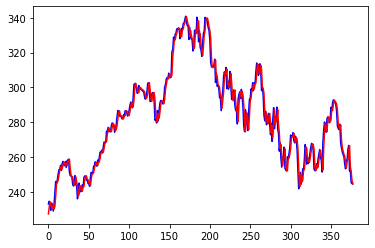

In [52]:
fig, ax = plt.subplots()
ax.plot(test.to_list(),color="b")
ax.plot(predictions,color="r")
plt.show()

## Cuestiones
- ¿Qué ocurre si el modelo no se entrena con cada nueva observación?
- ¿Qué ocurre si cambiamos de modelo ARIMA(1,0,0) o ARIMA(5,1,2)?
- ¿Qué ocurre si reducimos el threshold de entreno?
- ¿Qué ocurre si el periodo de la serie no es mensual?

## Estructuración de aplicaciones para aplicar algoritmos supervisados

El objetivo de nuestro analisis será predecir el valor del cierre de MSFT en función del valor del cierre de IBM y GOOGLE y el uso de dos indices Dow Jones y S&P500

In [57]:
# 1. Carga de datos / Loading data

from sklearn.linear_model import LinearRegression
import pandas as pd
import pandas_datareader.data as web
import numpy as np

stk_tickers = ['MSFT', 'IBM', 'GOOGL']
stk_data = web.DataReader(stk_tickers, 'yahoo')   # from Yahoo Finance
data = stk_data[('Adj Close',  'MSFT')]

idx_tickers = ['SP500', 'DJIA'] #S&P500 y Dow Jone index
idx_data = web.DataReader(idx_tickers, 'fred')    # from FRED 


In [67]:
# Tomamos un periodo de 5 dias, de valores medios sobre los indices y cierres de  L - V.
# Primero, unimos lo datos en un DF
print(type(stk_data))
print(type(idx_data))
print(stk_data.index)
print(idx_data.index)
# Ambos son DF. Entonces es una operación de Merge
dataset = stk_data.merge(idx_data, how="inner",left_index=True,right_index=True)
print(dataset)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex(['2017-09-22', '2017-09-25', '2017-09-26', '2017-09-27',
               '2017-09-28', '2017-09-29', '2017-10-02', '2017-10-03',
               '2017-10-04', '2017-10-05',
               ...
               '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-12',
               '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16',
               '2022-09-19', '2022-09-20'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)
DatetimeIndex(['2017-09-22', '2017-09-25', '2017-09-26', '2017-09-27',
               '2017-09-28', '2017-09-29', '2017-10-02', '2017-10-03',
               '2017-10-04', '2017-10-05',
               ...
               '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-12',
               '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16',
               '2022-09-19', '2022-09-20'],
              dtype='datetime64[ns]', name='DATE', length=1303, freq=

/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_72400/2553866448.py:8: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  dataset = stk_data.merge(idx_data, how="inner",left_index=True,right_index=True)


In [79]:
# Reconvertimos la frecuencia agrupando los valores.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
data5days = dataset.resample("1W-MON").mean()  # averaging all values along 5 days starting on Mondays 

data5days.head()


,"(Adj Close, MSFT)","(Adj Close, IBM)","(Adj Close, GOOGL)","(Close, MSFT)","(Close, IBM)","(Close, GOOGL)","(High, MSFT)","(High, IBM)","(High, GOOGL)","(Low, MSFT)","(Low, IBM)","(Low, GOOGL)","(Open, MSFT)","(Open, IBM)","(Open, GOOGL)","(Volume, MSFT)","(Volume, IBM)","(Volume, GOOGL)",SP500,DJIA
2017-09-25,69.379021,109.663303,46.938499,73.835003,139.101334,46.938499,74.380001,139.397705,47.243750,73.384998,138.384323,46.633749,74.039997,138.962715,47.0555,19130300.0,4186824.5,29482000.0,2499.440,22322.840
2017-10-02,69.549112,109.982877,48.033300,74.016000,139.506693,48.033300,74.300000,140.103253,48.292400,73.529999,138.682602,47.605700,73.882001,139.483749,47.7733,16170480.0,3429624.8,35913600.0,2512.484,22393.784
2017-10-09,70.889062,110.620499,49.100000,75.442001,140.315485,49.100000,75.660001,140.803058,49.280701,74.852000,139.885278,48.686000,75.123999,140.250476,48.8711,14409940.0,2623242.4,27082000.0,2543.690,22722.688
2017-10-16,72.347386,111.107396,50.163200,76.994000,140.933081,50.163200,77.212000,141.650092,50.433400,76.620000,140.564053,49.787300,76.837999,141.179730,50.0692,14785140.0,3463892.0,27630800.0,2553.524,22874.652
2017-10-23,73.433623,118.872011,50.161900,78.150000,150.782028,50.161900,78.342000,151.873807,50.526300,77.790001,149.432123,49.940400,78.003999,150.414914,50.3547,17742220.0,12640909.8,29009200.0,2564.582,23184.134


In [80]:
# Limpiamos series innecesarias
columns_to_remove = [0,1,2,6,7,8,9,10,11,12,13,14]
data5days = data5days.drop(data5days.columns[columns_to_remove],axis=1)

# Y renombramos columnas
columns_names = ["CloseMSFT","CloseIBM","CloseGOOGL","VolMSFT","VolIBM","VolGOOGL","SP500","DJIA"]
data5days.columns = columns_names
data5days.head()


,CloseMSFT,CloseIBM,CloseGOOGL,VolMSFT,VolIBM,VolGOOGL,SP500,DJIA
2017-09-25,73.835003,139.101334,46.938499,19130300.0,4186824.5,29482000.0,2499.440,22322.840
2017-10-02,74.016000,139.506693,48.033300,16170480.0,3429624.8,35913600.0,2512.484,22393.784
2017-10-09,75.442001,140.315485,49.100000,14409940.0,2623242.4,27082000.0,2543.690,22722.688
2017-10-16,76.994000,140.933081,50.163200,14785140.0,3463892.0,27630800.0,2553.524,22874.652
2017-10-23,78.150000,150.782028,50.161900,17742220.0,12640909.8,29009200.0,2564.582,23184.134


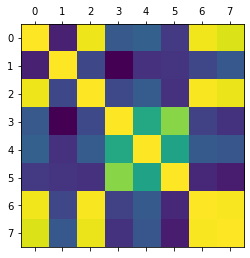

In [83]:
import matplotlib.pyplot as plt
correlation = data5days.corr()
plt.matshow(correlation)


In [ ]:
%pip install seaborn

<AxesSubplot:>

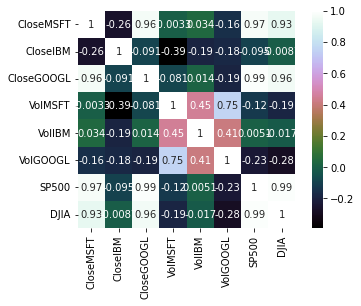

In [85]:
import seaborn as sns
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

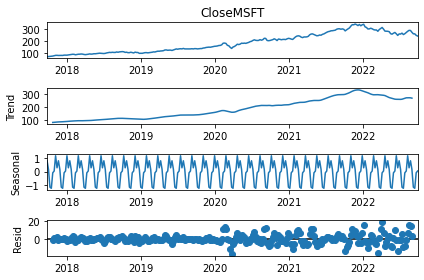

In [90]:
res = sm.tsa.seasonal_decompose(data5days.CloseMSFT,period=8) # que implica este 8?
fig = res.plot()
plt.show()

In [95]:
data5days[data5days.columns[1:]]

,CloseIBM,CloseGOOGL,VolMSFT,VolIBM,VolGOOGL,SP500,DJIA
2017-09-25,139.101334,46.938499,19130300.0,4186824.5,29482000.0,2499.4400,22322.840
2017-10-02,139.506693,48.033300,16170480.0,3429624.8,35913600.0,2512.4840,22393.784
2017-10-09,140.315485,49.100000,14409940.0,2623242.4,27082000.0,2543.6900,22722.688
2017-10-16,140.933081,50.163200,14785140.0,3463892.0,27630800.0,2553.5240,22874.652
2017-10-23,150.782028,50.161900,17742220.0,12640909.8,29009200.0,2564.5820,23184.134
...,...,...,...,...,...,...,...
2022-08-29,132.528000,112.792000,20027120.0,3334300.0,21799740.0,4111.3780,32710.598
2022-09-05,128.870001,108.687500,23415975.0,3083775.0,27160800.0,3958.0675,31569.040
2022-09-12,128.550002,109.229999,21321440.0,3149240.0,23727620.0,4014.4020,31806.830
2022-09-19,127.086000,103.620001,31079840.0,5469320.0,32914680.0,3910.6540,31008.796


In [97]:
# Aplicación de modelos de supervisado
from re import X
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

models = [LinearRegression,SVR,RandomForestRegressor]

X = data5days[data5days.columns[1:]]
Y = data5days.CloseMSFT

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=33)


In [112]:
test_results = []
train_results = []
names = []
for model in models:
    print("Appliying model: %s"%model.__name__)
    names.append(model.__name__)
    res = model().fit(X=X_train,y=y_train)
    train_result = mean_squared_error(res.predict(X_train), y_train) 
    train_results.append(train_result)

    test_result = mean_squared_error(res.predict(X_test), y_test)
    test_results.append(test_result)




Appliying model: LinearRegression
Appliying model: SVR
Appliying model: RandomForestRegressor


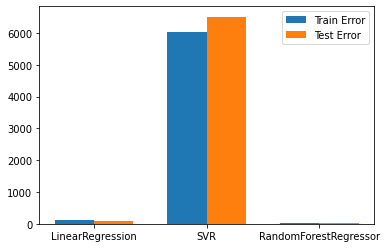

In [113]:
ind = np.arange(len(models)) 
width = 0.35 # the width of the bars

fig,ax = plt.subplots()
plt.bar(ind - width/2, train_results, width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.show()

# Más allá de la regresión lineal simple

En la sesión de hoy seguiremos trabajando con las técnicas de regresión, profundizaremos
en las técnicas de regresión lineal y veremos otras técnicas de regresión no lineal.
Por otra parte revisaremos las métricas más usadas para este problema. Finalmente
trabajaremos en la automatización de los procesos de aprendizaje automático.

1. Uso de la regularización
2. Regresión no lineal: un ejemplo
3. Métricas de regresión
4. Buenas prácticas I: Conjuntos de entrenamiento y test.


## 1. Uso de la regularización

Una forma de encontrar una buena relación entre el sesgo y la varianza es ajustar la complejidad del modelo a través de
**la regularización**. La regularización es un método muy útil para manejar
colinealidad (alta correlación entre características), filtrar el ruido de los datos y
eventualmente evitará el _overfitting_. El concepto detrás de la regularización es introducir
información adicional (sesgo) para penalizar los valores extremas de los parámetros.

Si tenemos que la expresión para una regresión lineal es: $$y = w_0x_0+w_1x_1+...+w_nx_n=\sum^m_{i=0} w_i X_{i}$$

Y la función que queremos minimizar es: $$J(w) = \sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2 $$


### Ridge Regression
La _Ridge Regression_ es un modelo que usa una penalización aplicando la norma L2 donde simplemente agregamos
la suma al cuadrado de los pesos de nuestra función de coste:

$$ J(w)_{Ridge} = \sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2 + \lambda\| w \|_2$$

El uso de esta regresión sería el siguiente:

In [114]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)

Al aumentar el valor del hiperparámetro $\lambda$, aumentamos la fuerza de la regularización
y encogemos los pesos de nuestro modelo. Hay que tener en cuenta que no regularizamos
el término del _intercepto_ ($w_0$).

### Lasso Regression (L1)
Un enfoque alternativo que puede conducir a modelos dispersos es la regresión LASSO.
Según sea el valor del término de regularización, ciertos pesos pueden coger el valor cero,
lo que hace que este tipo de regresión LASSO también sea útil como técnica de selección de características
supervisada.

La función a minimizar en este caso es:
$$ J(w)_{Lasso} = \sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2 + \lambda\| w \|_1$$

El uso de esta regresión sería el siguiente:

In [115]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

### Elastic Net Regression

Sin embargo, una limitación de LASSO es que selecciona como máximo $n$ variables si $ m > n $.
_Elastic Net_ ofrece un buen compromiso entre la _Ridge_ _regression_  y LASSO, que tiene una
Penalización L1 para generar una selección de características y penalización L2 para superar algunas de las limitaciones de la regresión LASSO, como es el número de variables seleccionadas.

La función a minimizar en este caso es:

$$ J(w)_{Elasticnet} = \sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2 + \lambda_1 \sum^n_{i=1} w^2_j + \lambda_2 \sum^n_{i=1} w_j $$

El uso de esta regresión sería el siguiente:

In [116]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)

### Regresión polinómica
La regresión polinomial es un caso especial de regresión lineal en el que se construyen nuevas características en
función del grado del polinomio que se quiera construir.
En las secciones anteriores, hemos asumido una relación lineal entre las variables del modelo y
la variable objetivo. Una forma de no tener en cuenta el supuesto de linealidad es
usar un modelo de regresión polinomial, es decir agregando términos polinomiales.

$$ y = w_0 + w_1x + w_2x^2 + ... + w_dx^d $$

donde $d$ es el grado del polinomio. Aunque podemos usar un polinomio
para modelar una relación no lineal, todavía se considera una
modelo de regresión lineal debido a los coeficientes $w$.


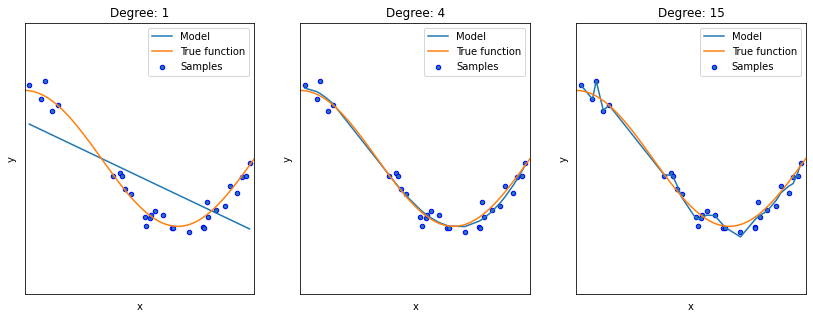

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    
    linear_regression = LinearRegression()
    polynomial_features = PolynomialFeatures(degree=degrees[i])
    polynomial = polynomial_features.fit_transform(X[:, np.newaxis])
    
    linear_regression.fit(polynomial, y)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X, linear_regression.predict(polynomial), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")

    plt.title( "Degree: " + str(degrees[i]))
    
plt.show()

## 2. Regresión no lineal: un ejemplo

Cuando queremos resolver un problema usando un modelo más complejo podemos elegir alguno de los siguientes:

- Árboles de regresión
- Bosques de regresión
- SVM para la regresión
- Y todos los modelos que existen...

Realizaremos un ejercicio con los árboles de decisión debido a que son fáciles de entender y que en sesiones futuras
trabajaremos con los análogos de los Bosques de regresión y las SVM para problemas de clasificación.

Los **árboles de decisión (DT)** son un método de aprendizaje supervisado no paramétrico que se utiliza para
clasificación y regresión. El objetivo es crear un modelo que prediga el valor de una variable objetivo mediante
el aprendizaje de reglas de decisión simples inferidas de las características de los datos. Un árbol puede verse como
una aproximación de una función a trozos.

En sci-kit la clase que modela este tipo de árboles se llama `DecisionTreeRegressor` [enlace](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

Veamos un ejemplo sencillo:

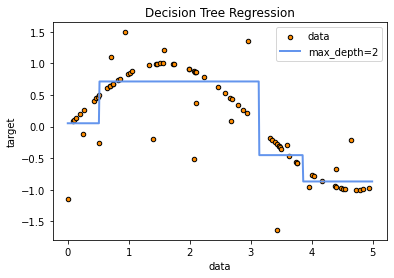

In [118]:
# Importamos las librerias necesarias
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Generamos un conjunto de datos (función seno)
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Entrenamos el modelo

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

# Realizamos una predicción
X_test = np.expand_dims(np.arange(0.0, 5.0, 0.01), 1)
y_1 = regr_1.predict(X_test)

# Mostramos los resultados
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Vamos a ver la estructura del primer árbol que hemos entrenado para entender mejor el proceso que ha seguido:

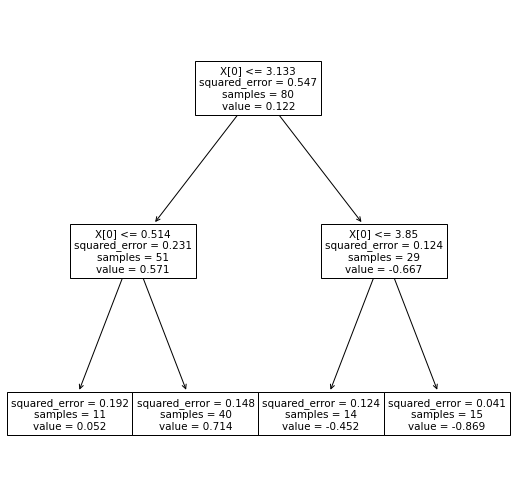

In [119]:
from sklearn import tree
plt.figure(figsize=(9,9))
tree.plot_tree(regr_1);

**Ejercicio**

- Cambia el parámetro _max_depth_ del modelo. Que pasa si es 1? Que pasa si es 5 o mayor?
- Visualiza el árbol resultante. 
- Cuál es la medida de Score de este método (mirar documentación)? Como cambia al permitir árboles más profundos?
- Busca en la documentación de Sci-kit de los Bosques de Regresión ( _RandomForestRegressor_ ) compara el score obtenido cuando incrementamos el número de árboles, manteniendo la misma profundidad.

## 3 Métricas para problemas de regression

Las métricas más comunes en los problemas de regresión son el **error cuadrático** y el **error absoluto**, y sus distintas modificaciones.

### 3.1 Errores cuadráticos

El **error cuadrático (Squared Error)** de un valor predicho con respecto al valor real, se calcula cómo:

$$ SE = \sum_j\left[\hat{y}_j - y_j\right]^2$$


**Error cuadrático medio (Mean Squared Error)** Da una idea del error de nuestras predicciones dando más peso a los errores grandes.

$$ MSE = \frac{1}{m}\sum_j^m \left[\hat{y}_j - y_j\right]^2 $$

**Raiz del error cuadrático medio (Root Mean Square Error)** La raíz cuadrada del MSE produce el error de la raíz cuadrada de la media o la desviación de la raíz cuadrada media (RMSE o RMSD). Tiene las mismas unidades que la cantidad que estima. Para un estimador sin sesgo (bies), el RMSE es la raíz cuadrada de la varianza, es decir la desviación estandar.

$$ RMSE = \sqrt{\frac{1}{m}\sum_j^m \left[\hat{y}_j - y_j\right]^2} $$



A pesar de ser una de las métricas más utilizadas, tiene el inconveniente de ser sensible a los valores extremos (outliers). Cuando este comportamiento pueda suponer un problema, los **errores absolutos** pueden darnos una mejor medida de rendimiento.

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set(rc={'figure.figsize':(12, 8)})

In [ ]:
## Escribe una función que devuelva el MSE y el RMSE dados dos arrays de numpy

def MSE(x1, x2):
    """
    Returns the Root Mean Squared Error of the two input vectors
    """
    sq_error = ##
    mean_sq_error = np.##
    return mean_sq_error

def RMSE(x1, x2):
    """
    Returns the Root Mean Squared Error of two vectors. Depends on the MSE function
    """
    mse = MSE(x1, x2)
    root_mse = np.##
    return root_mse

### 3.2 Errores absolutos

El **error absoluto** (Absolute Error) se define cómo:

$$ AE = \sum_j \left|\hat{y}_j - y_j\right| $$

#### Error absoluto medio (Mean Absolute Error)

Es más robusto a los valores extremos y su interpretabilidad es más alta que la del RMSE ya que también está en las unidades de la variable a predecir con la ventaja de que el dato no ha sufrido ninguna transformación.

$$ MAE = \frac{1}{m} \sum_j^m \left|\hat{y}_j - y_j\right| $$

#### Error absoluto medio porcentual (Mean Average Percentage Error)

A pesar de su simpleza, presenta varios inconvenientes a la hora de usarlo de forma práctica. Por ejemplo, **no puede usarse cuando el valor de referencia es 0**. Además, **si se usa para elegir métodos predictivos seleccionará de forma sistemática un metodo que prediga valores bajos.**
[wiki](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)

$$ MAPE = \frac{1}{m} \sum_j^m \left|\frac{\hat{y}_j - y_j}{y_j}\right| $$

### 3.3 Generalización

Las dos **métricas** expuestas anteriormente pueden considerarse como **distancias entre el vector de valores reales y el predicho**. De hecho, el RMSE corresponde a la **distancia euclidiana**, también conocida como norma $l_2$ o $\lVert{v}\rVert_2$.

Por otro lado, el MAE corresponde a la norma $l_1$ o $\lVert{v}\rVert_1$. A esta distancia se la conoce como **distancia de manhattan**, porque sólo se puede viajar de un bloque a otro de la ciudad a traves de calles ortogonales.

De forma general, una norma $l_k$ o $\lVert{v}\rVert_k$ se calcula:

$$\lVert{v}\rVert_k = \left(|v_0|^k + ...+ |v_m|^k \right)^\frac{1}{k}$$

El concepto de distancia será particularmente útil en los problemas de segmentación (aprendizaje no supervisado)


### 3.4 Coeficiente de determinación ($R^2$)

El coeficiente determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo. El valor más alto obtenible será 1, aunque hay casos en los que puede presentar valores negativos. De forma intuitiva, $R^2$ compara el "fit" de nuestro modelo al de una linea recta horizontal. Dada una regresión lineal simple, un $R^2$ negativo sólo es posible cuando la ordenada en el origen o la pendiente están restringidas de forma que el mejor modelo es peor que una linea horizontal.

Si representamos la **varianza de la variable dependiente** por $\sigma^{2}$ y la **varianza residual** por $\sigma _{r}^{2}$, el coeficiente de determinación viene dado por la siguiente ecuación:

$$ R^{2}=1- \frac{\sigma_{r}^{2}}{\sigma ^{2}}$$


Siendo $\hat{y}_i$ el valor predicho de la muestra i y $y_i$ el valor real, el $R^2$ estimado sobre $n_{\text{muestras}}$ se define como:

$$ R^2(y, \hat{y}) = 1 - \frac{\sum_{i=0}^{n_{\text{samples}} - 1} (y_i - \hat{y}_i)^2}{\sum_{i=0}^{n_\text{samples} - 1} (y_i - \bar{y})^2}$$
donde $$ \bar{y} =  \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}} - 1} y_i$$

#### 3.4.1 Consideraciones R²

1. R² no puede determinar si los coeficientes y las predicciones tienen bies: Hay que checkear los residos --> Si observamos patrones en los plots de residuos es indicativo de un mal ajuste a pesar de un R2 elevado

1. Cada vez que añadimos un predictor a un modelo, el R² aumenta aunque sea por suerte, pero nunca decrece. Por consiguiente, un modelo con muchos terminos puede parecer mejor simplemente por el hecho de tener más terminos. Para prevenir este efecto, podemos usar el **adjusted R²**, una versión modificada que se ajusta al número de predictores en el modelo. De ésta forma, el R² solo aumenta si el nuevo término mejora el modelo más que por mera suerte. Siempre es más bajo que el R²

$$\bar{R}^2 = 1 - \frac{N-1}{N-k-1}(1-R^2)$$


n – numero de observaciones

k – numero de parametros